In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [49]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [50]:
# Create a tensor
tensor = Tensor(5*np.ones((3,5,1,5,2)))
tensor

This tensor is of order 5 and consists of 150 elements.
Sizes and names of its modes are (3, 5, 1, 5, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.

In [51]:
# Calculate Frobenious norm
f_norm = np.linalg.norm(tensor.data)
print(f_norm)

61.237243569579455


### Solution: Part 2

In [52]:
# Create tensors and collect information
no_of_elements = []
for i in range(3,21):
    tensor = Tensor(np.ones(tuple(2*np.ones(i).astype('int'))))
    no_of_elements.append(tensor.size)

    

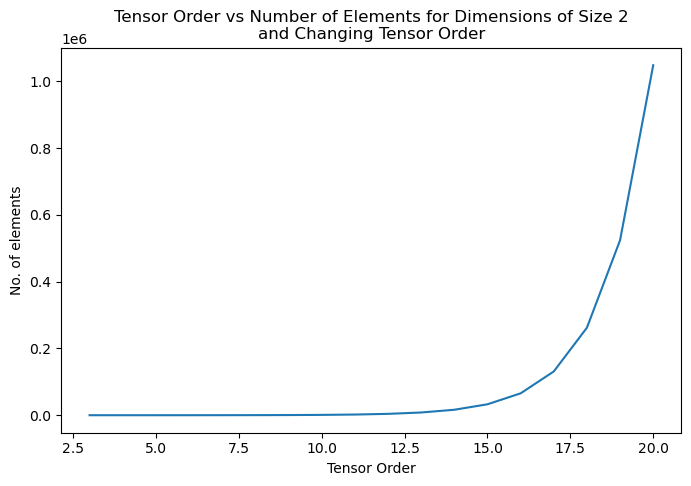

In [53]:
# Plot results
plt.figure(figsize=(8,5))
plt.plot(list(range(3,21)),no_of_elements)
plt.xlabel('Tensor Order')
plt.ylabel('No. of elements')
plt.title('Tensor Order vs Number of Elements for Dimensions of Size 2\nand Changing Tensor Order')
plt.show()

### Solution: Part 3

In [54]:
# Create tensors and collect information
# Create tensors and collect information
no_of_elements2 = []
for i in range(3,16):
    
    # order now remains at 3 but dimensions change
    tensor = Tensor(np.ones(tuple(i*np.ones(3).astype('int'))))
    no_of_elements2.append(tensor.size)

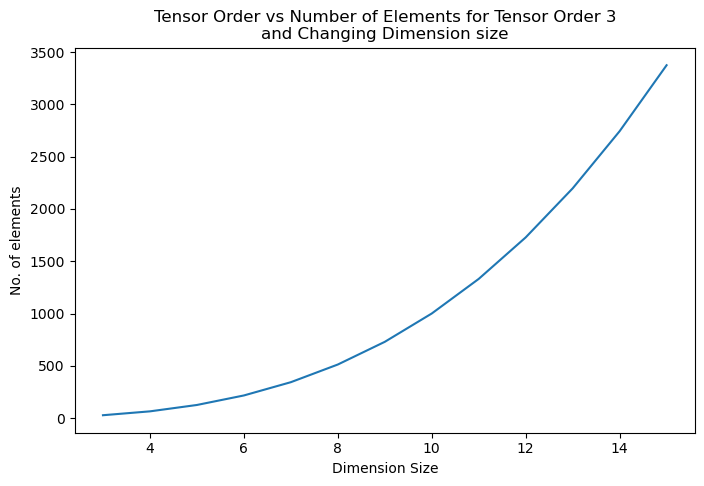

In [55]:
# Plot results
plt.figure(figsize=(8,5))
plt.plot(list(range(3,16)),no_of_elements2)
plt.xlabel('Dimension Size')
plt.ylabel('No. of elements')
plt.title('Tensor Order vs Number of Elements for Tensor Order 3\nand Changing Dimension size')
plt.show()

In [56]:
np.ones(tuple(i*np.ones(3).astype('int'))).shape

(15, 15, 15)

### Solution: Part 4

**Include comparison and analysis here**



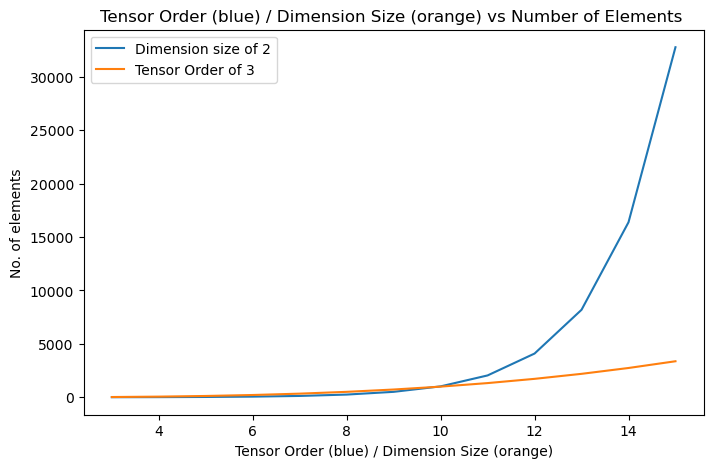

In [57]:
plt.figure(figsize=(8,5))
orders = list(range(3, 16))
plt.plot(orders, no_of_elements[:13])
plt.plot(orders, no_of_elements2)
plt.legend(['Dimension size of 2', 'Tensor Order of 3'])
plt.xlabel('Tensor Order (blue) / Dimension Size (orange)')
plt.ylabel('No. of elements')
plt.title('Tensor Order (blue) / Dimension Size (orange) vs Number of Elements ')
plt.show()
    

As seen in the Figure above, it can be seen that the number of elements increases far quicker for a fixed dimension size and increasing number of dimensions (tensor orders), than for a fixed tensor order and an increasing dimension size. This is a good exemplification of Bellman's curse of dimensionality. 

The number of elements for a dimension size of and Tensor order $d$ is eqaul to $2^d$, whereas the number of elements for a Tensor order of 3 and a dimension size of $n$ is given by $n^3$, if $d$ and $n$ are considered increasing at the same rate, as done in the graph above, then they are both equal to the iterator $i$, and for $i>10$, $2^i>i^3$ and for $i>>10$, $2^i>>i^3$. Increasing tensor order is far more detrimental in terms of required memory compared to increasing dimension size.

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [58]:
# Mode-2 fiber
tensor.data[0,1,:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
# Frontal slice
tensor.data[0,:,:]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [60]:
# Create a tensor of order 4
tensor = Tensor(np.arange(81).reshape((3,3,3,3)))
tensor

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.

In [61]:
# Display slices
for i in range(3):
    for j in range(3):
        print('tensor({a},:,:,{b})'.format(a=i,b=j))
        print(tensor.data[i,:,:,j])

tensor(0,:,:,0)
[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
tensor(0,:,:,1)
[[ 1  4  7]
 [10 13 16]
 [19 22 25]]
tensor(0,:,:,2)
[[ 2  5  8]
 [11 14 17]
 [20 23 26]]
tensor(1,:,:,0)
[[27 30 33]
 [36 39 42]
 [45 48 51]]
tensor(1,:,:,1)
[[28 31 34]
 [37 40 43]
 [46 49 52]]
tensor(1,:,:,2)
[[29 32 35]
 [38 41 44]
 [47 50 53]]
tensor(2,:,:,0)
[[54 57 60]
 [63 66 69]
 [72 75 78]]
tensor(2,:,:,1)
[[55 58 61]
 [64 67 70]
 [73 76 79]]
tensor(2,:,:,2)
[[56 59 62]
 [65 68 71]
 [74 77 80]]


In [62]:
# Display fibers
print(tensor.data[0,:,0,0])
print(tensor.data[1,:,1,1])
print(tensor.data[1,:,2,0])
print(tensor.data[1,:,0,2])
print(tensor.data[2,:,2,2])

[ 0  9 18]
[31 40 49]
[33 42 51]
[29 38 47]
[62 71 80]


### Solution: Part 2

In [63]:
# Create a tensor of order 3
tensor =  Tensor(np.ones((4,2,5)))
print(tensor)

# tensor slice is X[:,:,k]
for i in range(tensor.shape[2]):
    tensor.data[:,:,i] = 2**i
    print('Frontal Slice {k}'.format(k=i+1))
    print(tensor.data[:,:,i])
    

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
Frontal Slice 1
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Frontal Slice 2
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
Frontal Slice 3
[[4. 4.]
 [4. 4.]
 [4. 4.]
 [4. 4.]]
Frontal Slice 4
[[8. 8.]
 [8. 8.]
 [8. 8.]
 [8. 8.]]
Frontal Slice 5
[[16. 16.]
 [16. 16.]
 [16. 16.]
 [16. 16.]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [64]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [65]:
# Create a tensor
tensor = Tensor(np.arange(2*11*6*3).reshape(2,11,6,3))
tensor

This tensor is of order 4 and consists of 396 elements.
Sizes and names of its modes are (2, 11, 6, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.

In [66]:
# Display unfolded version
tensor.unfold(mode=0)
print(tensor)
tensor.data

This tensor is of order 2 and consists of 396 elements.
Sizes and names of its modes are (2, 198) and ['mode-0', 'mode-1_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [67]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [68]:
# Create original tensor 
array_3d = np.arange(4*4*5).reshape((4,4,5))
X = Tensor(array_3d)
X

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (4, 4, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.

In [69]:
# Create matrix
A = np.arange(5*4).reshape((5,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [70]:
# Perform mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)
Y

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (4, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.

In [71]:
# Validate equivalence between the left and right hand side
Y.unfold(mode=1, inplace=True).data

array([[  70,   76,   82,   88,   94,  190,  196,  202,  208,  214,  310,
         316,  322,  328,  334,  430,  436,  442,  448,  454],
       [ 190,  212,  234,  256,  278,  630,  652,  674,  696,  718, 1070,
        1092, 1114, 1136, 1158, 1510, 1532, 1554, 1576, 1598],
       [ 310,  348,  386,  424,  462, 1070, 1108, 1146, 1184, 1222, 1830,
        1868, 1906, 1944, 1982, 2590, 2628, 2666, 2704, 2742],
       [ 430,  484,  538,  592,  646, 1510, 1564, 1618, 1672, 1726, 2590,
        2644, 2698, 2752, 2806, 3670, 3724, 3778, 3832, 3886],
       [ 550,  620,  690,  760,  830, 1950, 2020, 2090, 2160, 2230, 3350,
        3420, 3490, 3560, 3630, 4750, 4820, 4890, 4960, 5030]])

In [72]:
# testing equivalence
X = Tensor(array_3d)
testY = A@(X.unfold(mode=1, inplace=False).data)
np.allclose(Y.data, testY) # will print true or false

True

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [73]:
# Create tensor
X = Tensor(np.arange(45).reshape((3,3,5)))
X

This tensor is of order 3 and consists of 45 elements.
Sizes and names of its modes are (3, 3, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.

In [74]:
# Create matrices
A = np.arange(21).reshape(7,3)
B1 = np.arange(15).reshape(5,3)
B2 = np.arange(21).reshape(3,7)

In [75]:
# Validate property 1
Y1 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y1 = Y1.mode_n_product(B1, mode=1, inplace=False)
Y2 = X.mode_n_product(B1, mode=1, inplace=False)
Y2 = Y2.mode_n_product(A, mode=0, inplace=False)
# Display results
print(Y1)
print(Y2)
# if true then equivalent
print(np.allclose(Y2.data,Y1.data))

This tensor is of order 3 and consists of 175 elements.
Sizes and names of its modes are (7, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
This tensor is of order 3 and consists of 175 elements.
Sizes and names of its modes are (7, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
True


In [76]:
# Validate property 2
Y3 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y3 = Y3.mode_n_product(B2, mode=0, inplace=False)
Y4 = X.mode_n_product(np.matmul(B2,A), mode=0, inplace=False)
# Display results
print(Y3)
print(Y4)
# if true then equivalent
print(np.allclose(Y4.data,Y3.data))

This tensor is of order 3 and consists of 45 elements.
Sizes and names of its modes are (3, 3, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
This tensor is of order 3 and consists of 45 elements.
Sizes and names of its modes are (3, 3, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
True


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [77]:
%%latex
The aim is to prove the following equivalence
\begin{equation}
    \mathbf{X \times_n A \times_n B = X \times_n(BA)}
\end{equation}

\begin{equation}
    \mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}
\end{equation}

Using the mathematical expression of a mode-$n$ product, defined in eqaution (2) it follows that:
\begin{align}
    \mathbf{X \times_n A = Y \rightarrow{} Y_{(n)} = AX_{(n)}}
\end{align}
Considering the expression on the LHS of (1), using the equation (3), it follows that
\begin{align}
    \mathbf{X \times_n A \times_n B = Y \times_n B = BY_{(n)} = BAX_{(n)}=(BA)X_{(n)}}
\end{align}

    
Again, using the mathematical expression of a mode-$n$ product, defined in eqaution (2), it finally follows that:
    
\begin{align}
    \mathbf{X \times_n A \times_n B = X \times_{n} (BA)}
\end{align}

As required


<IPython.core.display.Latex object>